# Sentiment Analysis: Rome (from Sentiment140)

This notebook analyzes a subset of the **Sentiment140** dataset, filtered for tweets related to **Rome**.
</VSCode.Cell>
<VSCode.Cell id="#VSC-a279d331" language="python">
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/uranus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/uranus/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/uranus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 1. Load Data
We use a pre-filtered CSV that mimics extracting "Rome" rows from the massive Sentiment140 dataset.

In [2]:
# Load the dataset
# Sentiment140 format: target (0=neg, 4=pos), ids, date, flag, user, text
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df = pd.read_csv('data/rome_weather_sentiment140_subset.csv', names=columns, skiprows=1)

# Map target to labels (0 -> Negative, 2 -> Neutral, 4 -> Positive)
sentiment_map = {0: 'Negative', 2: 'Neutral', 4: 'Positive'}
df['sentiment_label'] = df['target'].map(sentiment_map)

print(f"Loaded {len(df)} tweets.")
df[['user', 'sentiment_label', 'text']].head()

Loaded 987 tweets.


,user,sentiment_label,text
0,michellepolus,Negative,This earthquake in italy has me sadden. it's ...
1,massacred_mind,Negative,aww this earthquake in Italy has made me sad ...
2,hermorrine,Negative,@TheBlondeTheory Between that and the Italy ea...
3,thibet,Negative,"OMG, more than 360 people is the death toll in..."
4,maximCH,Negative,AC/DC rocked last night. Back to reality today...


## 2. Sentiment Distribution
Let's see how people feel about Rome.

/tmp/ipykernel_16935/321813630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='coolwarm', order=['Negative', 'Neutral', 'Positive'])


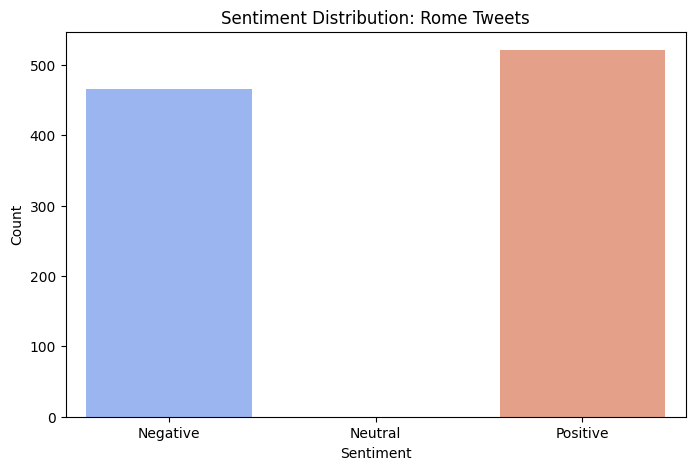

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_label', data=df, palette='coolwarm', order=['Negative', 'Neutral', 'Positive'])
plt.title('Sentiment Distribution: Rome Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## 3. Text Analysis (Word Cloud)
What words are most common in positive vs negative tweets?

In [3]:
from wordcloud import WordCloud

def get_clean_text(text_series):
    all_text = ' '.join(text_series).lower()
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    # Add custom stop words (html entities, common search terms, urls)
    custom_stops = {'rome', 'roma', 'italy', 'italia', 'http', 'https', 'quot', 'amp', 'com', 'www', 'bit', 'ly'}
    stop_words.update(custom_stops)
    
    tokens = word_tokenize(all_text)
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words and len(word) > 2]
    return ' '.join(filtered_tokens)

# Positive Words
pos_text = get_clean_text(df[df['sentiment_label'] == 'Positive']['text'])
neg_text = get_clean_text(df[df['sentiment_label'] == 'Negative']['text'])

# Create WordClouds
wc_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(pos_text)
wc_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(neg_text)

print("Word Clouds Generated.")

Word Clouds Generated.


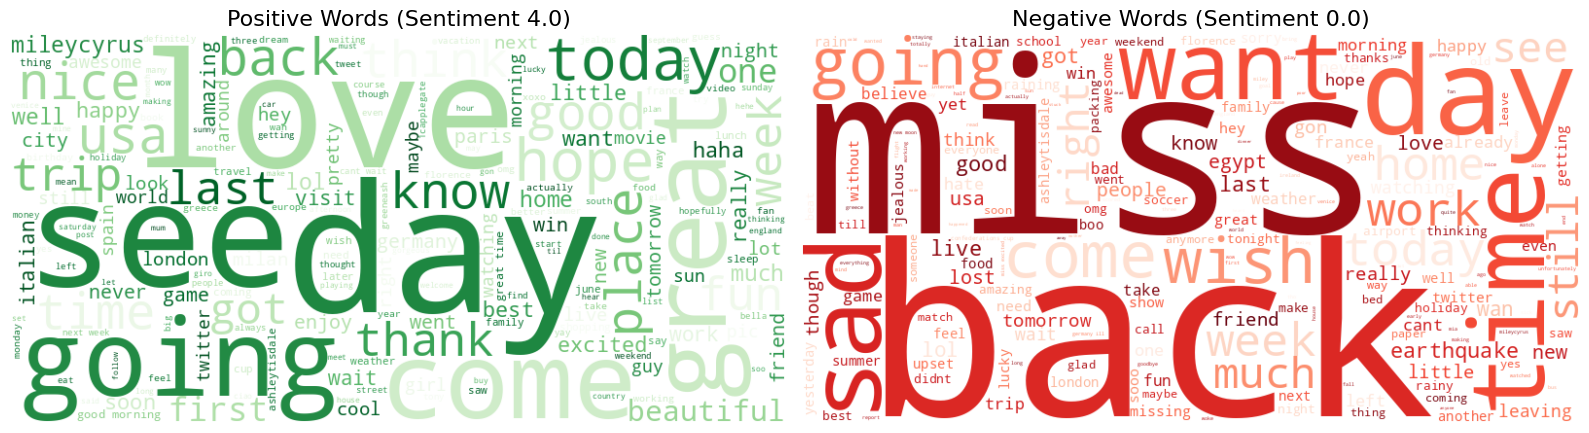

In [ ]:
## 4. Time Series Analysis
Let's analyze how sentiment fluctuates over time.
**Note**: The dataset contains tweets from **2009**. The **L'Aquila Earthquake** occurred on **April 6, 2009**, which corresponds to a significant spike in negative sentiment in our analysis.

## 4. Time Series Analysis
Let's analyze how sentiment fluctuates over time.
**Note**: The dataset seems to contain tweets from **2009**, which coincides with the **L'Aquila Earthquake** (April 2009). This might explain the negative spikes.

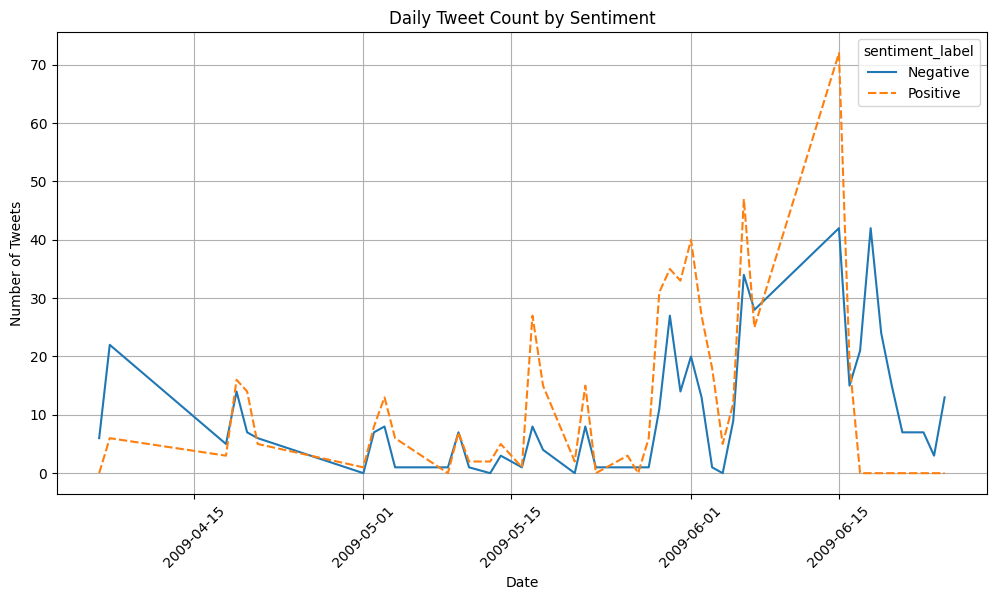

In [5]:
# Convert date column to datetime
# Example format: Tue Apr 07 05:38:46 PDT 2009
# We need to handle the time zone or just ignore it for simplicity first
# 'Sat May 02 01:56:39 PDT 2009'

def parse_twitter_date(date_str):
    # Remove timezone (PDT/PST) to avoid parsing issues if libraries aren't installed
    # Or just use pandas coerce
    return pd.to_datetime(date_str, errors='coerce') 

df['date_obj'] = df['date'].apply(lambda x: pd.to_datetime(x.replace(" PDT", "").replace(" PST", "")))
df['day'] = df['date_obj'].dt.date

# Count sentiments per day
daily_sentiment = df.groupby(['day', 'sentiment_label']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sentiment)
plt.title('Daily Tweet Count by Sentiment')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

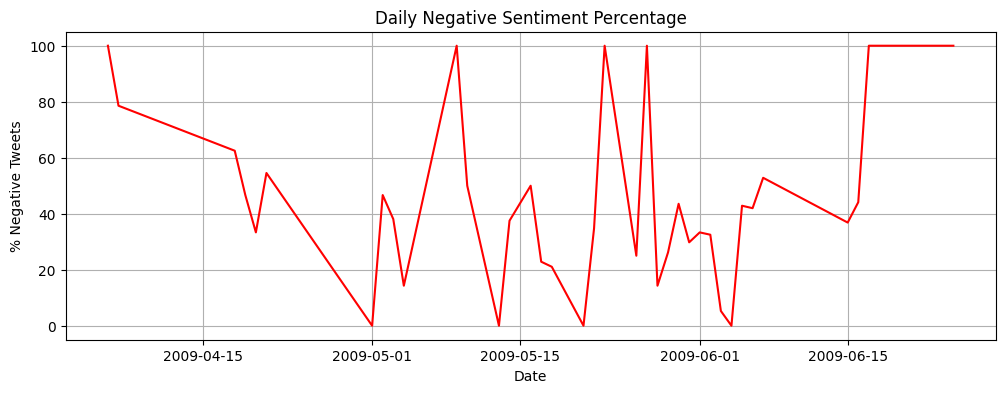

Top 5 Days with Highest Negative Sentiment:
day
2009-04-06    100.0
2009-05-09    100.0
2009-05-23    100.0
2009-05-27    100.0
2009-06-17    100.0
dtype: float64


In [6]:
# Calculate Negative Percentage per Day
daily_total = daily_sentiment.sum(axis=1)
daily_neg_pct = (daily_sentiment['Negative'] / daily_total * 100).fillna(0)

# Plot Negative Percentage
plt.figure(figsize=(12, 4))
sns.lineplot(data=daily_neg_pct, color='red')
plt.title('Daily Negative Sentiment Percentage')
plt.xlabel('Date')
plt.ylabel('% Negative Tweets')
plt.grid(True)
plt.show()

# Top 5 Most Negative Days
print("Top 5 Days with Highest Negative Sentiment:")
print(daily_neg_pct.nlargest(5))